![](TheSparksFoundationLogo.png)

# GRIP @ The Sparks Foundation

## Task 1: Prediction using Supervised ML

## Author: Renuka Prasad Patwari

### Simple Linear Regression 

This is a simple linear regression task that finds the co-relation between the hours a student studies and the scores secured. 

In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#Read data from remote link
url="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data imported sucessfully")

s_data.head()

Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
s_data.shape

(25, 2)

#### Dataset contains 25 rows and 2 columns

## Checking for null values

In [6]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### No null value present

## Data Visualization

#### To try and manually find relationship in the data, we create a 2-D Graph

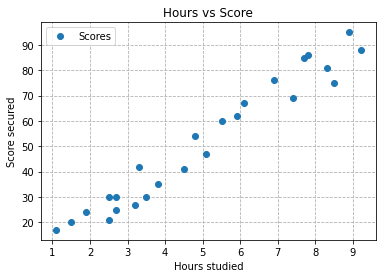

In [61]:
s_data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Score secured")
plt.grid(linestyle='--')
plt.show()

#### We can see a positive co-relation between the hours studied and the score secured

### Setting input and target variables

In [34]:
#x-->input variable
x=np.array(s_data['Hours']).reshape(-1, 1)
x.shape

(25, 1)

In [35]:
#y-->target variable
y=np.array(s_data['Scores'])
y.shape

(25,)

### Dividing dataset into 80% training and 20% testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Training the algorithm

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete")

Training complete


### Plotting Regression Line

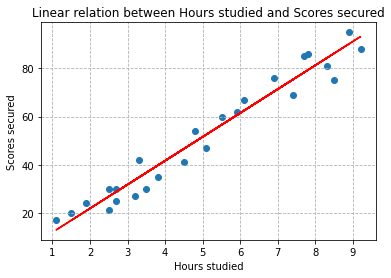

In [56]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.xlabel("Hours studied")
plt.ylabel("Scores secured")
plt.title("Linear relation between Hours studied and Scores secured")
plt.plot(x, line, color='red')
plt.grid(linestyle='--')
plt.show()

### Making Predictions

In [44]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing actual and predicted

In [45]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
#Percentage of Training score and Testing score
print('Training Score:', regressor.score(X_train, y_train)*100)
print('Testing Score:', regressor.score(X_test, y_test)*100)

Training Score: 95.15510725211553
Testing Score: 94.54906892105356


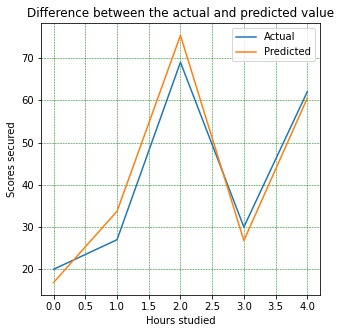

In [74]:
# Plotting the Line graph to depict the difference between the actual and predicted value

df.plot(kind='line',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', linestyle='--', color='green')
plt.xlabel('Hours studied')
plt.ylabel('Scores secured')
plt.title('Difference between the actual and predicted value')
plt.show()

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [65]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the model

Primary metrics used to evaluate linear models: <br>
Mean absolute error (Represents average error) <br>
Root mean squared error (Difference between the estimate and actual value of a parameter of the model)


In [69]:
print("Mean Absolute Error = ", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error =  4.183859899002975
Root Mean Squared Error =  4.6474476121003665


Low Mean Absolute Error and Root Mean Squared Error. Therefore trivial chances of wrong prediction.

## Thankyou :)